# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import os

# Import API key

from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [4]:
cityid =[]
cloudiness = []
date = []
humidity = []
foundcities = []
lat = []
lon =[]
temp_max = []
country = []
windspeed =[]

c = 0
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        cityid.append(response['id'])
        cloudiness.append(response['clouds']['all'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        country.append(response['sys']['country'])
        windspeed.append(response['wind']['speed'])
        foundcities.append(city)
        ids = response['id']
        c = c+1
        print(f'Proccessing Record {c} | city id {ids} , {city}')
    except:
        pprint(f"{city} not found skipping")
        pass
# pprint(f"The latitude information received is: {lat}")
# pprint(f"The temperature information received is: {temp}")

Proccessing Record 1 | city id 2088122 , port moresby
Proccessing Record 2 | city id 3450083 , santa maria
Proccessing Record 3 | city id 5935341 , dauphin
Proccessing Record 4 | city id 3466165 , cidreira
Proccessing Record 5 | city id 3421319 , nuuk
'tabiauea not found skipping'
Proccessing Record 6 | city id 2122605 , okhotsk
Proccessing Record 7 | city id 4032243 , vaini
Proccessing Record 8 | city id 2138555 , poum
Proccessing Record 9 | city id 2206939 , bluff
Proccessing Record 10 | city id 2063036 , port lincoln
Proccessing Record 11 | city id 2122090 , pevek
Proccessing Record 12 | city id 3833367 , ushuaia
Proccessing Record 13 | city id 3892454 , diego de almagro
Proccessing Record 14 | city id 3443061 , chuy
Proccessing Record 15 | city id 3361934 , saldanha
Proccessing Record 16 | city id 2074865 , carnarvon
Proccessing Record 17 | city id 5880054 , barrow
Proccessing Record 18 | city id 2075265 , busselton
Proccessing Record 19 | city id 3874787 , punta arenas
Proccessing

Proccessing Record 151 | city id 921772 , moroni
Proccessing Record 152 | city id 5067114 , douglas
Proccessing Record 153 | city id 7117100 , vila
'marcona not found skipping'
'chagda not found skipping'
Proccessing Record 154 | city id 3401845 , conceicao do araguaia
Proccessing Record 155 | city id 4160812 , key west
Proccessing Record 156 | city id 4393451 , kennett
Proccessing Record 157 | city id 3374083 , bathsheba
Proccessing Record 158 | city id 2111884 , miyako
Proccessing Record 159 | city id 2171845 , cessnock
Proccessing Record 160 | city id 2065594 , mount isa
Proccessing Record 161 | city id 5915359 , cap-chat
Proccessing Record 162 | city id 2629833 , husavik
Proccessing Record 163 | city id 1513491 , komsomolskiy
Proccessing Record 164 | city id 1254046 , tura
Proccessing Record 165 | city id 3416888 , grindavik
Proccessing Record 166 | city id 1644932 , ende
Proccessing Record 167 | city id 1644605 , galesong
Proccessing Record 168 | city id 5919850 , chapais
Proccess

Proccessing Record 300 | city id 2090021 , namatanai
Proccessing Record 301 | city id 1490918 , staryy nadym
Proccessing Record 302 | city id 4328010 , houma
Proccessing Record 303 | city id 4301317 , morehead
Proccessing Record 304 | city id 3664243 , feijo
Proccessing Record 305 | city id 3470709 , barra do garcas
Proccessing Record 306 | city id 1520316 , oskemen
Proccessing Record 307 | city id 1261853 , narasannapeta
Proccessing Record 308 | city id 3492908 , santo domingo
Proccessing Record 309 | city id 3418910 , upernavik
Proccessing Record 310 | city id 10722858 , svetlogorsk
Proccessing Record 311 | city id 3137469 , sorland
Proccessing Record 312 | city id 1510689 , baykit
Proccessing Record 313 | city id 3161456 , bjerkvik
'nguiu not found skipping'
Proccessing Record 314 | city id 4031637 , lavrentiya
Proccessing Record 315 | city id 1252840 , wokha
'halalo not found skipping'
Proccessing Record 316 | city id 529368 , marfino
Proccessing Record 317 | city id 3092472 , mari

Proccessing Record 451 | city id 1488903 , turukhansk
'malwan not found skipping'
Proccessing Record 452 | city id 2122293 , ozernovskiy
'skagastrond not found skipping'
Proccessing Record 453 | city id 3381538 , grand-santi
Proccessing Record 454 | city id 117574 , sanandaj
Proccessing Record 455 | city id 1056899 , sambava
Proccessing Record 456 | city id 3354077 , opuwo
Proccessing Record 457 | city id 2729907 , longyearbyen
Proccessing Record 458 | city id 523583 , nagorsk
Proccessing Record 459 | city id 325336 , adilcevaz
Proccessing Record 460 | city id 3385899 , tutoia
Proccessing Record 461 | city id 4362001 , mayo
Proccessing Record 462 | city id 1529484 , hami
Proccessing Record 463 | city id 1623197 , tual
Proccessing Record 464 | city id 1185095 , teknaf
Proccessing Record 465 | city id 3452712 , porto murtinho
Proccessing Record 466 | city id 293842 , gat
Proccessing Record 467 | city id 2022773 , khandyga
Proccessing Record 468 | city id 2013279 , vostok
Proccessing Reco

In [5]:
#check if we have the right number of items pulled and are equal
print(len(cityid))
print(len(cloudiness))
print(len(date))
print(len(humidity))
print(len(foundcities))
print(len(lat))
print(len(lon))
print(len(temp_max))
print(len(country))
print(len(windspeed))

578
578
578
578
578
578
578
578
578
578


In [6]:
response

{'cod': '404', 'message': 'city not found'}

In [7]:
city_dict = {
                "City_ID": cityid,
                "City": foundcities,
                "Country": country,
                "Date": date,
                "Lat": lat,
                "Lng": lon,
                "Max Temp": temp_max,
                "Humidity": humidity,
                "Cloudiness": cloudiness,
                "Wind Speed": windspeed
                }

city_data = pd.DataFrame(city_dict)
city_data = city_data.dropna() 
city_data = city_data.sort_values(by ='Lng', ascending = False)
len(city_data)

city_data.head()


,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
279,2126710,beringovskiy,RU,1644099910,63.0500,179.3167,-10.55,93,54,13.78
276,2123814,leningradskiy,RU,1644099830,69.3833,178.4167,-22.02,96,8,3.74
338,2186338,murupara,NZ,1644100068,-38.4667,176.7000,70.56,100,100,3.29
107,2179756,waiuku,NZ,1644100007,-37.2500,174.7500,72.66,99,100,8.01
437,2186111,ngunguru,NZ,1644099881,-35.6167,174.5000,76.15,97,100,12.71


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
output_path = os.path.join("..","output_data", "cities.csv")
city_data.to_csv(output_path, index=False, header=True)

In [9]:
city_data = pd.read_csv('../output_data/cities.csv')
city_data = city_data.dropna() 
city_data = city_data.sort_values(by ='Lng', ascending = False)
city_data

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,2126710,beringovskiy,RU,1644099910,63.0500,179.3167,-10.55,93,54,13.78
1,2123814,leningradskiy,RU,1644099830,69.3833,178.4167,-22.02,96,8,3.74
2,2186338,murupara,NZ,1644100068,-38.4667,176.7000,70.56,100,100,3.29
3,2179756,waiuku,NZ,1644100007,-37.2500,174.7500,72.66,99,100,8.01
4,2186111,ngunguru,NZ,1644099881,-35.6167,174.5000,76.15,97,100,12.71
...,...,...,...,...,...,...,...,...,...,...
573,4036284,alofi,NU,1644099884,-19.0595,-169.9187,80.49,89,98,8.05
574,4031637,lavrentiya,RU,1644100061,65.5833,-171.0000,-15.97,94,9,9.64
575,4031574,provideniya,RU,1644099886,64.3833,-173.3000,-4.45,85,2,10.25
576,4032243,vaini,TO,1644099766,-21.2000,-175.2000,78.96,100,100,14.97


In [10]:
city_data.describe()

,City_ID,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,5.710000e+02,5.710000e+02,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,2.653550e+06,1.644100e+09,19.385015,20.650015,48.442049,73.644483,56.192644,8.596743
std,1.641809e+06,1.057627e+02,33.750428,90.252738,32.485552,20.927814,40.799527,6.096510
min,5.315700e+04,1.644099e+09,-54.800000,-179.166700,-45.920000,10.000000,0.000000,0.000000
25%,1.504119e+06,1.644100e+09,-8.176150,-59.839550,26.495000,64.000000,10.500000,4.070000
50%,2.177671e+06,1.644100e+09,22.833300,26.891000,61.930000,78.000000,74.000000,7.070000
75%,3.624072e+06,1.644100e+09,48.530500,98.981800,75.300000,89.000000,99.000000,11.500000
max,1.072286e+07,1.644100e+09,78.218600,179.316700,94.590000,100.000000,100.000000,37.020000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
over_100 = city_data.loc[city_data['Humidity']>100]
over_100

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed


In [12]:
#  Get the indices of cities that have humidity over 100%.
clean_data = city_data.drop(city_data.loc[city_data['Humidity']>100].index, inplace=False)
clean_data.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,2126710,beringovskiy,RU,1644099910,63.0500,179.3167,-10.55,93,54,13.78
1,2123814,leningradskiy,RU,1644099830,69.3833,178.4167,-22.02,96,8,3.74
2,2186338,murupara,NZ,1644100068,-38.4667,176.7000,70.56,100,100,3.29
3,2179756,waiuku,NZ,1644100007,-37.2500,174.7500,72.66,99,100,8.01
4,2186111,ngunguru,NZ,1644099881,-35.6167,174.5000,76.15,97,100,12.71


In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The Chart below is looking at the Temperature vs the Latitude.  You can infer that there is a relationship as the higher the latitude the lower the temp.  You can validate this with a regression line

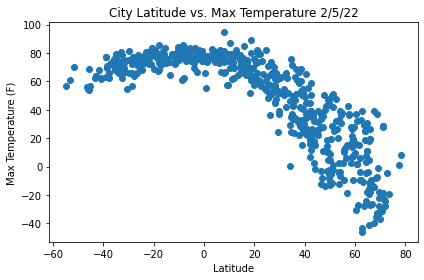

In [43]:
plt.scatter(clean_data['Lat'],clean_data['Max Temp'])
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature 2/5/22')
plt.tight_layout()
plt.savefig("../Images/lat_vs_max_temp.png")
plt.show()

## Latitude vs. Humidity Plot

The chart below is looking at the Humidity vs the Latitude.  There seems to be less of a relationship with the latitude.  It may be interesting to look at Longitude to see if there is a better cluster

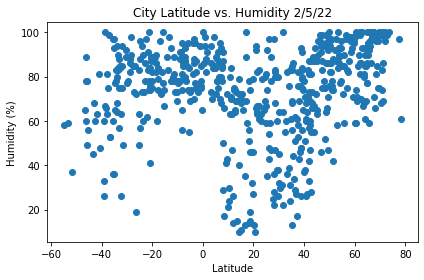

In [42]:
plt.scatter(clean_data['Lat'],clean_data['Humidity'])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity 2/5/22')
plt.tight_layout()
plt.savefig("../Images/lat_vs_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

On Feb 2/5/22, there seems to be very polaring cloudiness as it cluster closes to 100 and 0.  So there is a very loose relationship as you go up an down the equator.

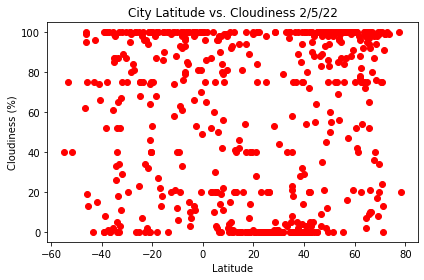

In [41]:
plt.scatter(clean_data['Lat'],clean_data['Cloudiness'], c = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness 2/5/22')
plt.tight_layout()
plt.savefig("../Images/lat_vs_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

This graph is looking at windspeed at various horizontal points of the world.  It seems that the 7mph is common across the wrold and ther ewere some outliers in the higher latitude areas (near the north pole)

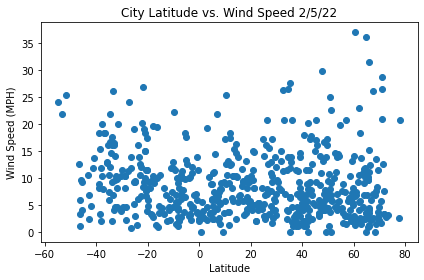

In [40]:
plt.scatter(clean_data['Lat'],clean_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.title('City Latitude vs. Wind Speed 2/5/22')
plt.tight_layout()
plt.savefig("../Images/lat_vs_windspeed.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [27]:
clean_data_northern = clean_data.loc[clean_data['Lat']>=0]
clean_data_southern = clean_data.loc[clean_data['Lat']<=0]

The r-squared is: 0.7418960376227772
The r is: -0.8613338711688849


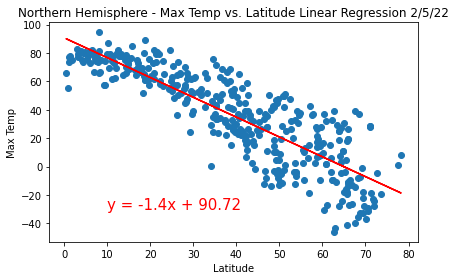

In [31]:
 
x_values = clean_data_northern['Lat']
y_values = clean_data_northern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-squared is: {rvalue**2}")
print(f"The r is: {rvalue}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,-30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression 2/5/22')

plt.tight_layout()
plt.savefig("../Images/regress_max_temp_vs_lat.png")
plt.show()

Temp and Latitude have a strong inverse relationship in the northern hemp.  This means as the latitudes go up the temp go down.  We can feel confident that this may be a good indicator for other datapoints becuase we have a strong R^2

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Conversely, in the Southern Hemisphere, currently there is a weaker positive correlation where the temps go up as the latitudes come closer to the equator.  it is summer time in the southern hemp so it drives these results.

The r-squared is: 0.36536166191912045
The r is: 0.6044515381063402


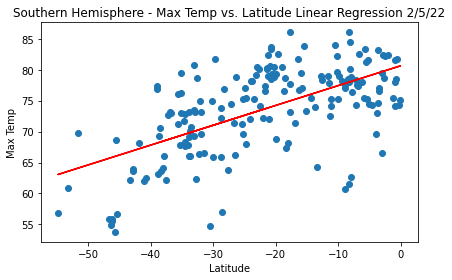

In [32]:
 
x_values = clean_data_southern['Lat']
y_values = clean_data_southern['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression 2/5/22')
print(f"The r-squared is: {rvalue**2}")
print(f"The r is: {rvalue}")
plt.tight_layout()
plt.savefig("../Images/regress_south_max_temp_vs_lat.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Very Weak correlation betwen Humidity and Lat in The northern Hemp

The r-squared is: 0.143377899378315
The r is: 0.37865274246770614


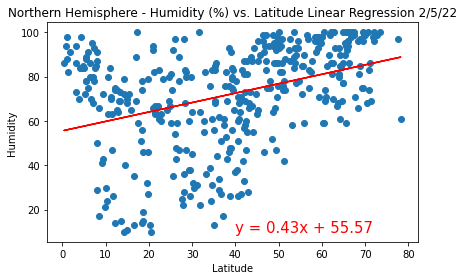

In [34]:
 
x_values = clean_data_northern['Lat']
y_values = clean_data_northern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 2/5/22')
print(f"The r-squared is: {rvalue**2}")
print(f"The r is: {rvalue}")
plt.tight_layout()
plt.savefig("../Images/regress_humidity_vs_lat.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Very Weak correlation betwen Humidity and Lat in The Southern Hemp. This is not statistically significant.

The r-squared is: 0.13133229075839298
The r is: 0.3623979728949832


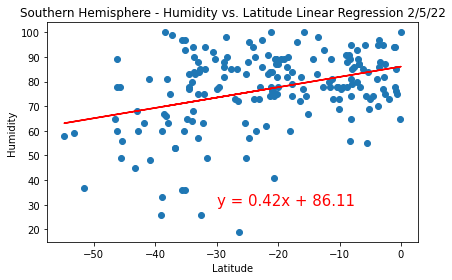

In [35]:
x_values = clean_data_southern['Lat']
y_values = clean_data_southern['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression 2/5/22')
print(f"The r-squared is: {rvalue**2}")
print(f"The r is: {rvalue}")
plt.tight_layout()
plt.savefig("../Images/regress_south_humidity_vs_lat.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Very Weak correlation betwen Humidity and Lat in The Northern Hemp. This is not statistically significant.

The r-squared is: 0.10794742225309403
The r is: 0.328553530270326


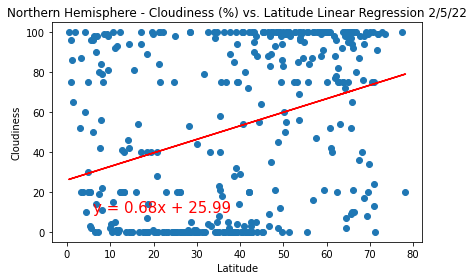

In [36]:
x_values = clean_data_northern['Lat']
y_values = clean_data_northern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 2/5/22')
print(f"The r-squared is: {rvalue**2}")
print(f"The r is: {rvalue}")
plt.tight_layout()
plt.savefig("../Images/regress_cloudiness_vs_lat.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Very Weak correlation betwen Humidity and Lat in The Southern Hemp. This is not statistically significant.

The r-squared is: 0.02896261542480427
The r is: 0.1701840633690601


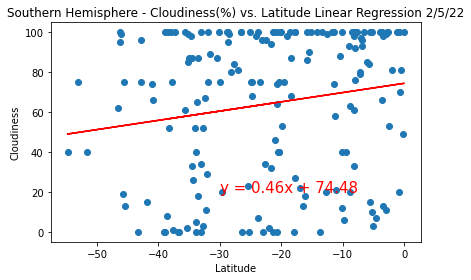

In [37]:
x_values = clean_data_southern['Lat']
y_values = clean_data_southern['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression 2/5/22')
print(f"The r-squared is: {rvalue**2}")
print(f"The r is: {rvalue}")
plt.tight_layout()
plt.savefig("../Images/regress_south_cloudiness_vs_lat.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Very Weak correlation betwen Humidity and Lat in The Northern Hemp. This is not statistically significant.

The r-squared is: 0.0014333669767698815
The r is: 0.03785983329030757


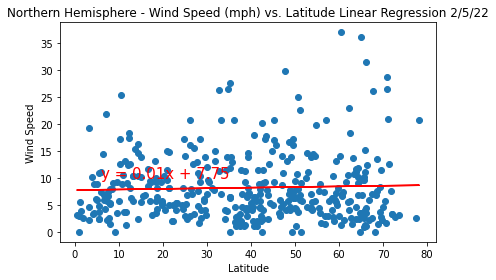

In [38]:
x_values = clean_data_northern['Lat']
y_values = clean_data_northern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 2/5/22')
print(f"The r-squared is: {rvalue**2}")
print(f"The r is: {rvalue}")
plt.tight_layout()
plt.savefig("../Images/regress_south_cloudiness_vs_lat.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Very Weak inverse correlation betwen Humidity and Lat in The Southern Hemp. This is not statistically significant.

The r-squared is: 0.0916191146255649
The r is: -0.3026864956114906


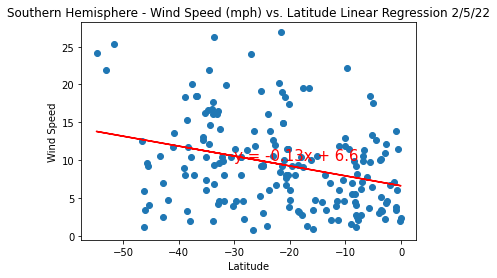

In [39]:
x_values = clean_data_southern['Lat']
y_values = clean_data_southern['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# y = m(Slope)x + b (intecept)
regress_values = x_values * slope + intercept
# we get a list of regrss values that creates a line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 2/5/22')
print(f"The r-squared is: {rvalue**2}")
print(f"The r is: {rvalue}")
plt.show()